# Netflix Case Study - Data Analysis and Visualization

### About NETFLIX

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

### Business Problem

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

In [1]:
# importing the required libiaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset 

df=pd.read_csv('netflix.csv')


#### Analysing basic metrics

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Check number of rows and colums does the dataset have

print(f'No of Rows : {df.shape[0]} , No of Columns : {df.shape[1]}')

No of Rows : 8807 , No of Columns : 12


In [4]:
# check the basic data types of each column in dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# seeing the missing values in the dataset

df.isnull().sum().sort_values(ascending=False) / len(df)*100

director        29.908028
country          9.435676
cast             9.367549
date_added       0.113546
rating           0.045418
duration         0.034064
show_id          0.000000
type             0.000000
title            0.000000
release_year     0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [10]:
# Analysing the basic statistical metrics 

df.describe(include="all")


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [4]:
# droping the description column as it not required for analysis

df = df.drop(columns=['description'])

In [5]:
# renaming the listed_in column to genre 

df = df.rename(columns={"listed_in": "genre"})

## Unnesting the columns
 * director
 * cast
 * genre
 * country
 


In [6]:
# unnesting Director column

director_df= df[['show_id','director']]
director_df= pd.DataFrame(director_df['director'].apply(lambda x: str(x).split(',')).tolist(),index=df['show_id']).stack().reset_index()
director_df=director_df.drop(columns=['level_1'],axis=1)
director_df.columns = ['show_id','director']
director_df.head()

,show_id,director
0,s1,Kirsten Johnson
1,s2,nan
2,s3,Julien Leclercq
3,s4,nan
4,s5,nan


In [7]:
# Unnesting the cast column

cast_df = df[['show_id', 'cast']]
cast_df = pd.DataFrame(cast_df['cast'].apply(lambda x: str(x).split(',')).tolist(), index=df['show_id']).stack().reset_index()
cast_df = cast_df.drop(columns=['level_1'], axis=1)
cast_df.columns = ['show_id', 'cast']
cast_df.head()

,show_id,cast
0,s1,nan
1,s2,Ama Qamata
2,s2,Khosi Ngema
3,s2,Gail Mabalane
4,s2,Thabang Molaba


In [8]:
# Unnesting the country column

country_df = df[['show_id', 'country']]
country_df = pd.DataFrame(country_df['country'].apply(lambda x: str(x).split(',')).tolist(), index=df['show_id']).stack().reset_index()
country_df = country_df.drop(columns=['level_1'], axis=1)
country_df.columns = ['show_id', 'country']
country_df.head()

,show_id,country
0,s1,United States
1,s2,South Africa
2,s3,nan
3,s4,nan
4,s5,India


In [9]:
# Unnesting the genre column

genre_df = df[['show_id', 'genre']]
genre_df = pd.DataFrame(genre_df['genre'].apply(lambda x: str(x).split(',')).tolist(), index=df['show_id']).stack().reset_index()
genre_df = genre_df.drop(columns=['level_1'], axis=1)
genre_df.columns = ['show_id', 'genre']
genre_df.head()

,show_id,genre
0,s1,Documentaries
1,s2,International TV Shows
2,s2,TV Dramas
3,s2,TV Mysteries
4,s3,Crime TV Shows


In [10]:
# Dropping the columns that are unnested in the main dataset

df = df.drop(columns=['director', 'cast', 'country', 'genre'], axis=1)
df.head()

,show_id,type,title,date_added,release_year,rating,duration
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons
2,s3,TV Show,Ganglands,"September 24, 2021",2021,TV-MA,1 Season
3,s4,TV Show,Jailbirds New Orleans,"September 24, 2021",2021,TV-MA,1 Season
4,s5,TV Show,Kota Factory,"September 24, 2021",2021,TV-MA,2 Seasons


In [11]:
# Merging the datframe  with main dataframe

merged_df = df.merge(director_df, on="show_id", how="inner")
merged_df = merged_df.merge(cast_df, on="show_id", how="inner")
merged_df = merged_df.merge(country_df, on="show_id", how="inner")
merged_df = merged_df.merge(genre_df, on="show_id", how="inner")
merged_df.head()

,show_id,type,title,date_added,release_year,rating,duration,director,cast,country,genre
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,Kirsten Johnson,nan,United States,Documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,nan,Ama Qamata,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,nan,Ama Qamata,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,nan,Ama Qamata,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,nan,Khosi Ngema,South Africa,International TV Shows


In [12]:
# making sure all column are small letters
# Replacing nan with np.nan

merged_df["director"] = merged_df["director"].apply(lambda x: str(x).lower().strip())
merged_df["country"] = merged_df["country"].apply(lambda x: str(x).lower().strip())
merged_df["cast"] = merged_df["cast"].apply(lambda x: str(x).lower().strip())
merged_df["genre"] = merged_df["genre"].apply(lambda x: str(x).lower().strip())

# replace nan with np.nan
merged_df = merged_df.replace("nan", np.nan)
merged_df.head()

,show_id,type,title,date_added,release_year,rating,duration,director,cast,country,genre
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,kirsten johnson,NaN,united states,documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,NaN,ama qamata,south africa,international tv shows
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,NaN,ama qamata,south africa,tv dramas
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,NaN,ama qamata,south africa,tv mysteries
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,NaN,khosi ngema,south africa,international tv shows


## Fillna for `Country` Column

In order to fill na values in country column. we follow the following steps:

1. Firstly, will group the DataFrame `merged_df` by the 'release_year' column.
2. For each group that is each year,find the mode of the 'country' column using a lambda function.
3. If the mode is not empty, `it assigns the mode country to the rows where the 'release_year' matches the current year and the 'country' is null`.


In [14]:
mode_country_by_year = merged_df.groupby('release_year')['country'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

for year, mode_country in mode_country_by_year.items():
    if mode_country:
        merged_df.loc[(merged_df['release_year'] == year) & (merged_df['country'].isnull()), 'country'] = mode_country

In [155]:
# Checking for null values if they are filled
merged_df.isna().sum()

show_id             0
type                0
title               0
date_added        158
release_year        0
rating             67
duration            3
director        50643
cast             2149
country             1
genre               0
dtype: int64

In [15]:
# since only one row is having none value will drop that row
merged_df.dropna(subset=['country'], inplace=True)


In [157]:
mode_country_by_year.value_counts()

united states     57
india              9
egypt              4
italy              1
united kingdom     1
argentina          1
Name: country, dtype: int64

## Fillna for `cast` Column

For filling cast column, we do the following

1. group the DataFrame `merged_df` by the 'country' column.
2. For each group that is each country, find the mode of the 'cast' column using a lambda function.
3. If the mode is not empty, `it assigns the mode cast to the rows where the 'country' matches the current country and the 'cast' is null`.

In [16]:
mode_cast= merged_df.groupby('country')['cast'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

for country,mode_cast in mode_cast.items():
    if mode_cast:
        merged_df.loc[(merged_df['country']==country) & (merged_df['cast'].isnull()),'cast']=mode_cast

In [18]:
merged_df.isna().sum()

show_id             0
type                0
title               0
date_added        158
release_year        0
rating             67
duration            3
director        50642
cast               12
country             0
genre               0
dtype: int64

In [114]:
merged_df[merged_df['cast'].isnull()]

,show_id,type,title,date_added,release_year,rating,duration,director,cast,country,genre
27592,s1118,Movie,Ibrahim a Fate to Define,"April 1, 2021",2019,TV-PG,75 min,lina al abed,NaN,palestine,documentaries
27593,s1118,Movie,Ibrahim a Fate to Define,"April 1, 2021",2019,TV-PG,75 min,lina al abed,NaN,palestine,international movies
141008,s6234,Movie,Barbecue,"August 15, 2017",2017,TV-MA,101 min,matthew salleh,NaN,armenia,documentaries
141009,s6234,Movie,Barbecue,"August 15, 2017",2017,TV-MA,101 min,matthew salleh,NaN,armenia,international movies
141016,s6234,Movie,Barbecue,"August 15, 2017",2017,TV-MA,101 min,matthew salleh,NaN,mongolia,documentaries
141017,s6234,Movie,Barbecue,"August 15, 2017",2017,TV-MA,101 min,matthew salleh,NaN,mongolia,international movies
167546,s7342,Movie,Losing Sight of Shore,"May 1, 2017",2017,TV-14,92 min,sarah moshman,NaN,samoa,documentaries
167547,s7342,Movie,Losing Sight of Shore,"May 1, 2017",2017,TV-14,92 min,sarah moshman,NaN,samoa,sports movies
172545,s7557,Movie,Naledi: A Baby Elephant's Tale,"May 28, 2020",2016,TV-PG,91 min,ben bowie,NaN,botswana,documentaries
172547,s7557,Movie,Naledi: A Baby Elephant's Tale,"May 28, 2020",2016,TV-PG,91 min,geoff luck,NaN,botswana,documentaries


In [17]:
# since it is a categorical column fill the left null values with `No cast`
merged_df['cast'].fillna('No Cast',inplace=True)

In [19]:
merged_df.isna().sum()

show_id             0
type                0
title               0
date_added        158
release_year        0
rating             67
duration            3
director        50642
cast                0
country             0
genre               0
dtype: int64

## Fillna for `director` column

For filling null values in director column :

1. group the DataFrame `merged_df` by the 'country' column.
2. For each group that is  each country, find the mode of the 'director' column using a lambda function.
3. If the mode is not empty, `it assigns the mode director to the rows where the 'country' matches the current country and the 'director' is null`.

In [18]:
mode_director=merged_df.groupby('country')['director'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

for country,mode_director in mode_director.items():
    if mode_director:
        merged_df.loc[(merged_df['country']==country) & (merged_df['director'].isnull()),'director']=mode_director

In [32]:
merged_df.isna().sum()

show_id           0
type              0
title             0
date_added      158
release_year      0
rating           67
duration          3
director         94
cast              0
country           0
genre             0
dtype: int64

In [19]:
# Fill the reaming values as no director

merged_df['director'].fillna('No Director',inplace=True)

## Fillna for `rating` column

1. It groups the DataFrame `merged_df` by the 'country' column.
2. For each group (i.e., each country), find the mode of the 'rating' column using a lambda function.
3. If the mode is not empty, `it assigns the mode rating to the rows where the 'country' matches the current country and the 'rating' is null`.

In [20]:
mode_rating_by_country=merged_df.groupby('country')['rating'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

for country,mode_rating in mode_rating_by_country.items():
    if mode_rating:
        merged_df.loc[(merged_df['country']== country) & (merged_df['rating'].isnull()),'rating']=mode_rating

In [127]:
merged_df.isna().sum()

show_id           0
type              0
title             0
date_added      158
release_year      0
rating            0
duration          3
director          0
cast              0
country           0
genre             0
dtype: int64

## Fillna for `date_added` Column

For filling na values in date_added column. `create Timestamp object for each release year in the 'release_year' column. It sets the month and day to 1st January of that year`. 
This essentially creates a Timestamp object representing January 1st of each release year.

In [21]:
# Converting date_added column to datetime 

merged_df['date_added'] = pd.to_datetime(merged_df['date_added'])

In [132]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202064 entries, 0 to 202064
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202064 non-null  object        
 1   type          202064 non-null  object        
 2   title         202064 non-null  object        
 3   date_added    201906 non-null  datetime64[ns]
 4   release_year  202064 non-null  int64         
 5   rating        202064 non-null  object        
 6   duration      202061 non-null  object        
 7   director      202064 non-null  object        
 8   cast          202064 non-null  object        
 9   country       202064 non-null  object        
 10  genre         202064 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 18.5+ MB


In [22]:
merged_df['date_added'].fillna(merged_df['release_year'].apply(lambda x: pd.Timestamp(year=x, month=1, day=1)), inplace=True)

In [27]:
merged_df.isna().sum()

show_id         0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        3
director        0
cast            0
country         0
genre           0
dtype: int64

In [37]:
# Checking the null values
merged_df[merged_df['duration'].isna()]

,show_id,type,title,date_added,release_year,rating,duration,director,cast,country,genre
126582,s5542,Movie,Louis C.K. 2017,2017-04-04,2017,74 min,NaN,louis c.k.,louis c.k.,united states,movies
131648,s5795,Movie,Louis C.K.: Hilarious,2016-09-16,2010,84 min,NaN,louis c.k.,louis c.k.,united states,movies
131782,s5814,Movie,Louis C.K.: Live at the Comedy Store,2016-08-15,2015,66 min,NaN,louis c.k.,louis c.k.,united states,movies


In [23]:
# observe the values swapped in duration and rating column .
# Since only 3 rows are having null values we drop them.

merged_df.dropna(subset=['duration'],inplace=True)

In [29]:
merged_df.isna().sum()

show_id         0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
director        0
cast            0
country         0
genre           0
dtype: int64

# Now we have zero missing values , We can now proceed with our EDA 

### Non Graphical analysis



In [31]:
# Count of each genre

merged_df.groupby('genre')['show_id'].nunique().sort_values(ascending=False).iloc[:10]

genre
international movies        2752
dramas                      2427
comedies                    1674
international tv shows      1351
documentaries                869
action & adventure           859
tv dramas                    763
independent movies           756
children & family movies     641
romantic movies              616
Name: show_id, dtype: int64

In [44]:
# Total no of movies and shows done by each country

merged_df.groupby('country')['show_id'].nunique().sort_values(ascending=False).iloc[:10]

country
united states     4513
india             1049
united kingdom     806
canada             445
france             393
japan              318
spain              232
south korea        231
germany            226
mexico             169
Name: show_id, dtype: int64

In [33]:
# Total number of cast in each country

merged_df.groupby('country')['cast'].nunique().sort_values(ascending=False).iloc[:10]

country
united states     18249
india              3917
united kingdom     3878
canada             2742
france             2698
japan              1791
germany            1569
south korea        1400
spain              1319
mexico             1165
Name: cast, dtype: int64

In [34]:
# No of movies and Tv shows performed by each cast/actor

merged_df.groupby('cast')['show_id'].nunique().sort_values(ascending=False).iloc[:10]

cast
james franco          579
david attenborough    118
anupam kher            82
liam neeson            46
john paul tremblay     46
yuki kaji              38
shah rukh khan         35
mario casas            34
julie tejwani          33
takahiro sakurai       32
Name: show_id, dtype: int64

In [35]:
# No of directors per each country

merged_df.groupby('country')['director'].nunique().sort_values(ascending=False).iloc[:10]

country
united states     2635
india              739
united kingdom     515
france             329
canada             316
germany            186
spain              176
japan              133
china              117
mexico              99
Name: director, dtype: int64

In [175]:
# No  of unique countries for each rating.
merged_df.groupby('rating')['country'].nunique().sort_values(ascending=False).iloc[:10]

rating
TV-MA    97
TV-14    77
TV-PG    62
R        52
PG-13    50
PG       33
TV-G     33
TV-Y7    28
NR       26
TV-Y     25
Name: country, dtype: int64

In [176]:
# No of Movies performed by each director

merged_df.groupby('director')['show_id'].nunique().sort_values(ascending=False).iloc[:10]

director
martin scorsese      1360
sarah smith           268
toshiya shinohara     195
bong joon ho          169
robert vince          134
david dhawan           94
thierry donard         87
clay glen              69
weica wang             65
alfonso cuarón         57
Name: show_id, dtype: int64

In [46]:
tmp_df = pd.DataFrame(merged_df.groupby(["show_id", "country", "genre"]).size()).reset_index()
tmp_df

,show_id,country,genre,0
0,s1,united states,documentaries,1
1,s10,united states,comedies,11
2,s10,united states,dramas,11
3,s100,france,tv comedies,8
4,s100,france,tv dramas,8
...,...,...,...,...
23755,s998,united kingdom,british tv shows,1
23756,s998,united kingdom,docuseries,1
23757,s998,united kingdom,international tv shows,1
23758,s999,india,documentaries,1


In [47]:
count_df = tmp_df["genre"].value_counts()[:10]
count_df

international movies        3513
dramas                      3202
comedies                    1981
international tv shows      1465
action & adventure          1182
documentaries               1118
independent movies          1040
tv dramas                    852
children & family movies     845
thrillers                    806
Name: genre, dtype: int64

* Extracting year, month from date_added column and adding them back to the dataframe

In [27]:
merged_df['year_added']=merged_df['date_added'].dt.year
merged_df['month_added']= merged_df['date_added'].dt.month


In [28]:
# best month to relase a movie
merged_df['month_added_name']=merged_df['date_added'].dt.month_name()

top_5_months_movies=merged_df[merged_df['type']=='Movie'].groupby('month_added_name')['title'].nunique().sort_values(ascending=False).iloc[:5]
top_5_months_movies

month_added_name
July        565
April       549
December    547
January     546
October     545
Name: title, dtype: int64

* `Best Months` to add `Movies` to Netflix are:


    * July
    * April
    * December

In [179]:
# best month to relase a TV Show

top_5_months_TVShow=merged_df[merged_df['type']=='TV Show'].groupby('month_added_name')['title'].nunique().sort_values(ascending=False).iloc[:5]
top_5_months_TVShow

month_added_name
December     265
July         262
September    251
August       236
June         236
Name: title, dtype: int64

* `Best Months` to add `TV Shows` to Netflix are:


    * December
    * July
    * September

In [177]:
merged_df['day'] = merged_df['date_added'].dt.day_name()

top_2_days_Movie=merged_df[merged_df['type']=='Movie'].groupby('day')['title'].nunique().sort_values(ascending=False).iloc[:2]
top_2_days_Movie

day
Friday      1565
Thursday    1053
Name: title, dtype: int64

* `Best Day in week` to add `Movies` to Netflix are:


    * Friday
    * Thursday
    

In [180]:
top_2_days_TVShow=merged_df[merged_df['type']=='TV Show'].groupby('day')['title'].nunique().sort_values(ascending=False).iloc[:2]
top_2_days_TVShow

day
Friday       934
Wednesday    384
Name: title, dtype: int64

* `Best Day in week` to add `TV Shows` to Netflix are:


    * Friday
    * Wednesday
    

### Number of Movies and Tv Shows added by Netflix 

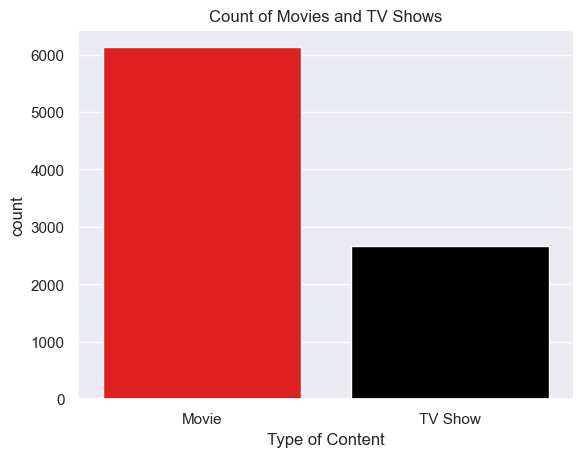

In [182]:
df1= pd.DataFrame(merged_df.groupby(['show_id','type']).size()).reset_index()
sns.countplot(data=df1,x='type',palette={'Movie': 'red', 'TV Show': 'black'})
sns.set(style="darkgrid")
plt.title('Count of Movies and TV Shows')
plt.xlabel('Type of Content')
plt.show()

### Distrubution of content added by netflix over the years

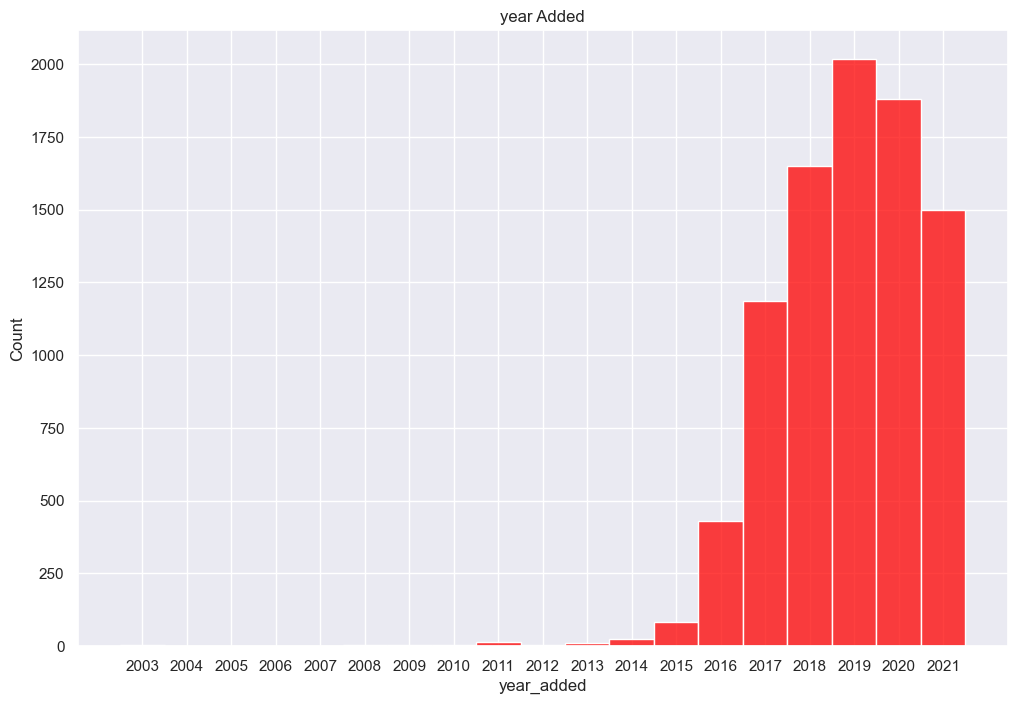

In [137]:
ya_df= pd.DataFrame(merged_df.groupby(['year_added','show_id']).size()).reset_index()
plt.figure(figsize=(12,8))
sns.histplot(ya_df['year_added'],bins=200,discrete=True,color='red')
sns.set(style="darkgrid")
plt.title('year Added')
plt.xticks(range(int(ya_df['year_added'].min()), int(ya_df['year_added'].max())+1))
#plt.xticks(rotation=45)
plt.show()

### Top 10 popular genres all over the Netflix

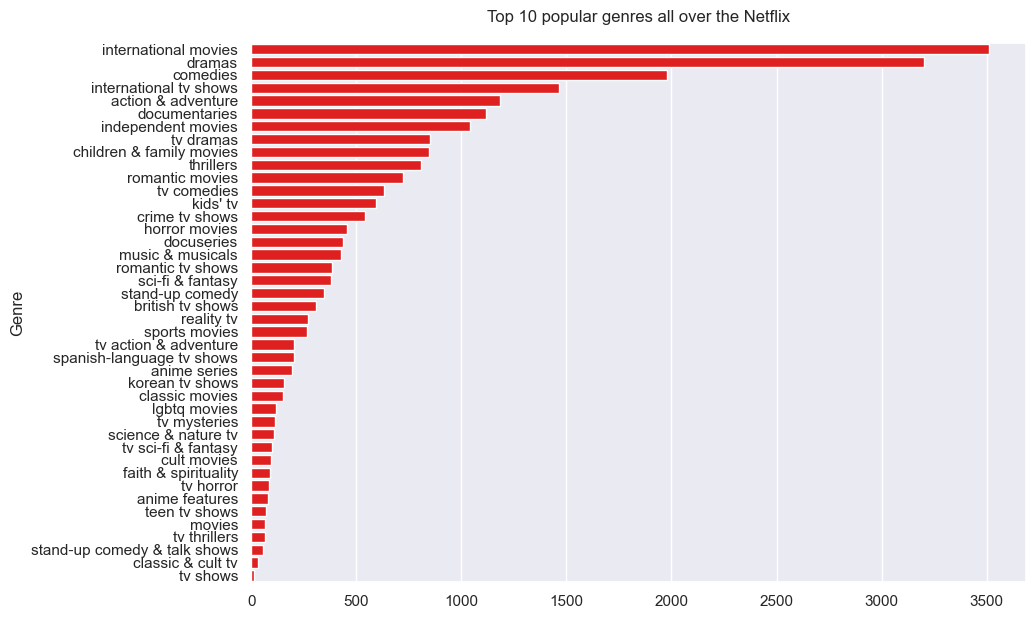

In [183]:
gen_df= pd.DataFrame(merged_df.groupby(['show_id','genre','country']).size()).reset_index().drop(columns=[0])
t_df = gen_df['genre'].value_counts()

# plotting the plot for top 10 genres over the netflix
plt.figure(figsize=(10, 7))
sns.barplot(x=t_df.values, y=t_df.index,color='Red')
sns.set(style="darkgrid")
plt.title("Top 10 popular genres all over the Netflix", fontsize=12, pad=15)
plt.ylabel("Genre", fontsize=12)
plt.show()

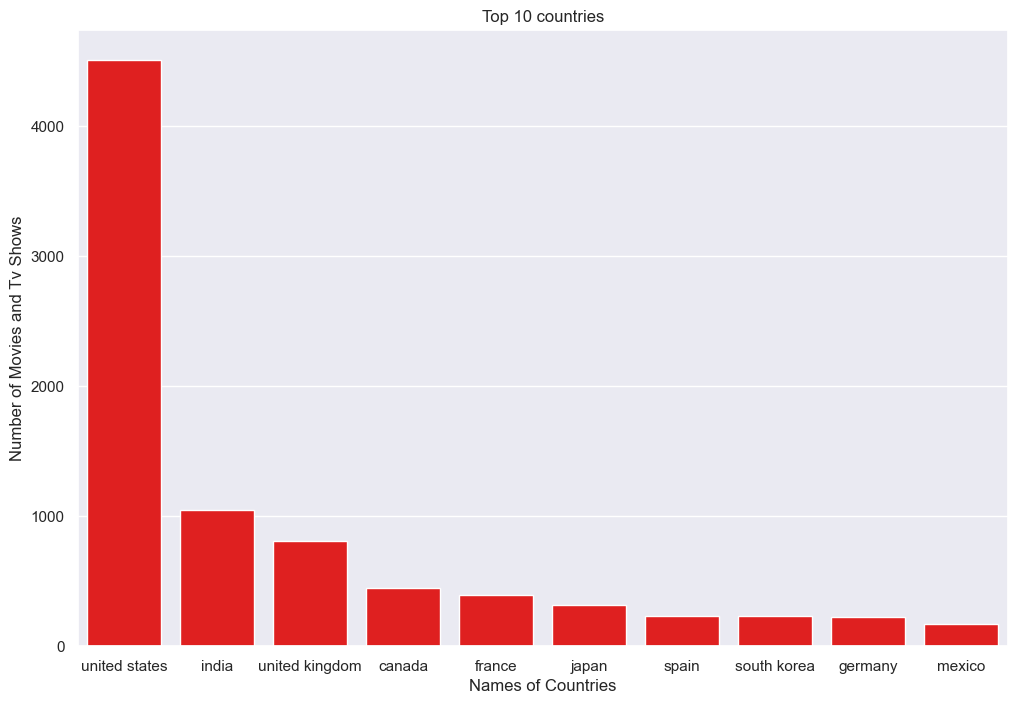

In [54]:
cs=pd.DataFrame(merged_df.groupby('country')['show_id'].nunique().sort_values(ascending=False).iloc[:10]).reset_index()
plt.figure(figsize=(12,8))
sns.barplot(data=cs,x='country',y='show_id',color='red')
plt.title('Top 10 countries')
plt.xlabel('Names of Countries')
plt.ylabel('Number of Movies and Tv Shows')
plt.show()

### Yearly Trends for Movies and Tv Shows

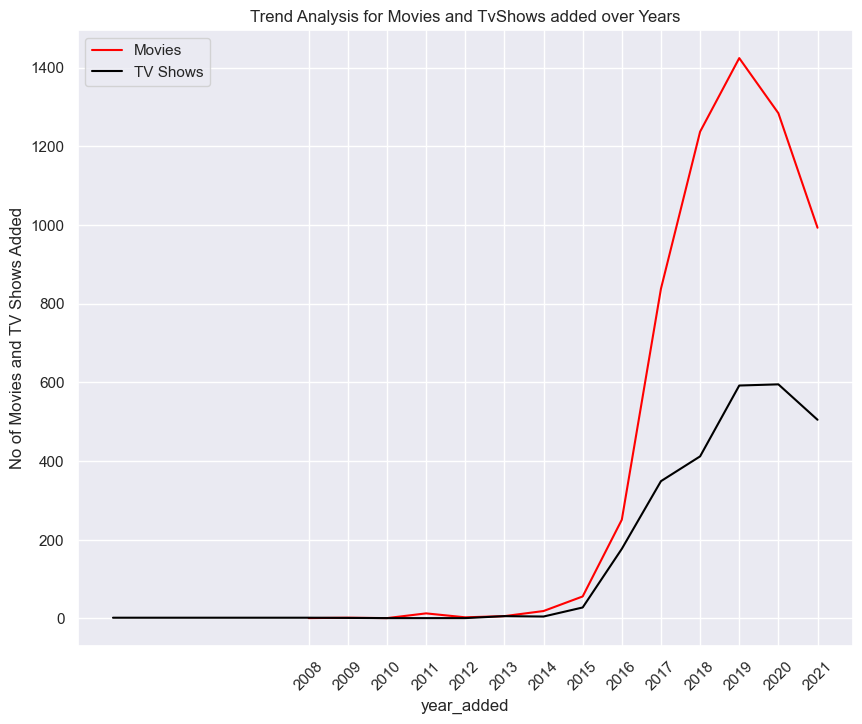

In [190]:
# yearly trends for movie vs tv show

trends = pd.DataFrame(merged_df.groupby(['show_id','type','year_added']).size()).reset_index()
trends=trends.drop(columns=['show_id'],axis=1)

movies_df = trends[trends['type'] == 'Movie']
tv_shows_df = trends[trends['type'] == 'TV Show']



movies_yearly_counts = pd.DataFrame(movies_df.groupby('year_added').size()).reset_index()
tv_shows_yearly_counts = pd.DataFrame(tv_shows_df.groupby('year_added').size()).reset_index()

plt.figure(figsize=(10,8))
sns.lineplot(data=movies_yearly_counts,x='year_added',y=0,label='Movies',color='red')
sns.lineplot(data=tv_shows_yearly_counts,x='year_added',y=0,label='TV Shows',color='black')
plt.title('Trend Analysis for Movies and TvShows added over Years')
plt.ylabel('No of Movies and TV Shows Added')
plt.xticks(range(int(movies_yearly_counts['year_added'].min()), int(movies_yearly_counts['year_added'].max())+1),rotation=45)
plt.show()

### Generating WordCloud

In [50]:
!pip install pandas matplotlib wordcloud

                                              0.0/300.2 kB ? eta -:--:--
     ---                                     30.7/300.2 kB 1.3 MB/s eta 0:00:01
     -----                                 41.0/300.2 kB 388.9 kB/s eta 0:00:01
     -----                                 41.0/300.2 kB 388.9 kB/s eta 0:00:01
     -----                                 41.0/300.2 kB 388.9 kB/s eta 0:00:01
     -----                                 41.0/300.2 kB 388.9 kB/s eta 0:00:01
     --------------------                 174.1/300.2 kB 655.4 kB/s eta 0:00:01
     --------------------                 174.1/300.2 kB 655.4 kB/s eta 0:00:01
     ----------------------------         235.5/300.2 kB 625.8 kB/s eta 0:00:01
     ---------------------------------    276.5/300.2 kB 680.9 kB/s eta 0:00:01
     -----------------------------------  297.0/300.2 kB 679.4 kB/s eta 0:00:01
     -----------------------------------  297.0/300.2 kB 679.4 kB/s eta 0:00:01
     -----------------------------------  297.0

### Wordcloud for Movies- Genre

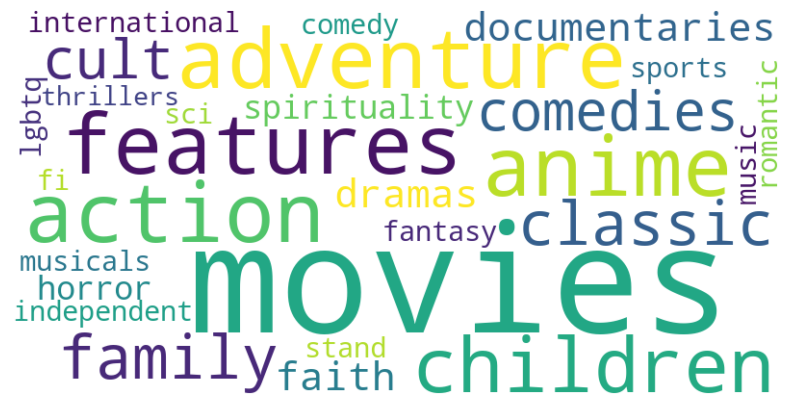

In [134]:
from wordcloud import WordCloud

df2=pd.DataFrame(merged_df[merged_df['type']=='Movie'].groupby('genre')['show_id'].nunique().reset_index())
text_data = " ".join(df2['genre'])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text_data)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Wordcloud for TVShows- Genre

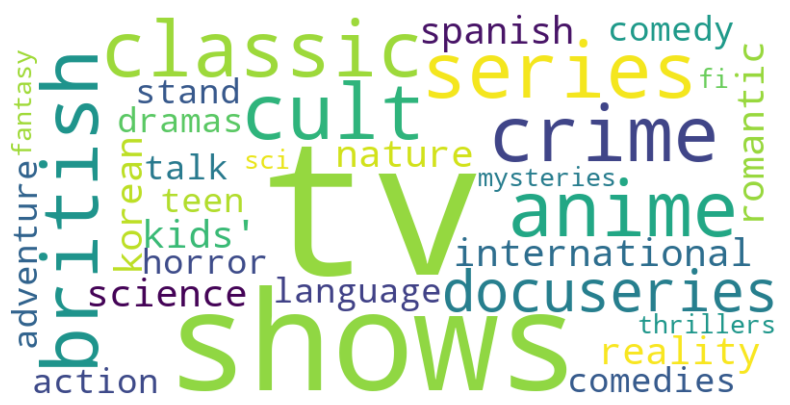

In [135]:

df_m=pd.DataFrame(merged_df[merged_df['type']=='TV Show'].groupby('genre')['show_id'].nunique().reset_index())
text_data = " ".join(df_m['genre'])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text_data)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Movies based on each Rating.

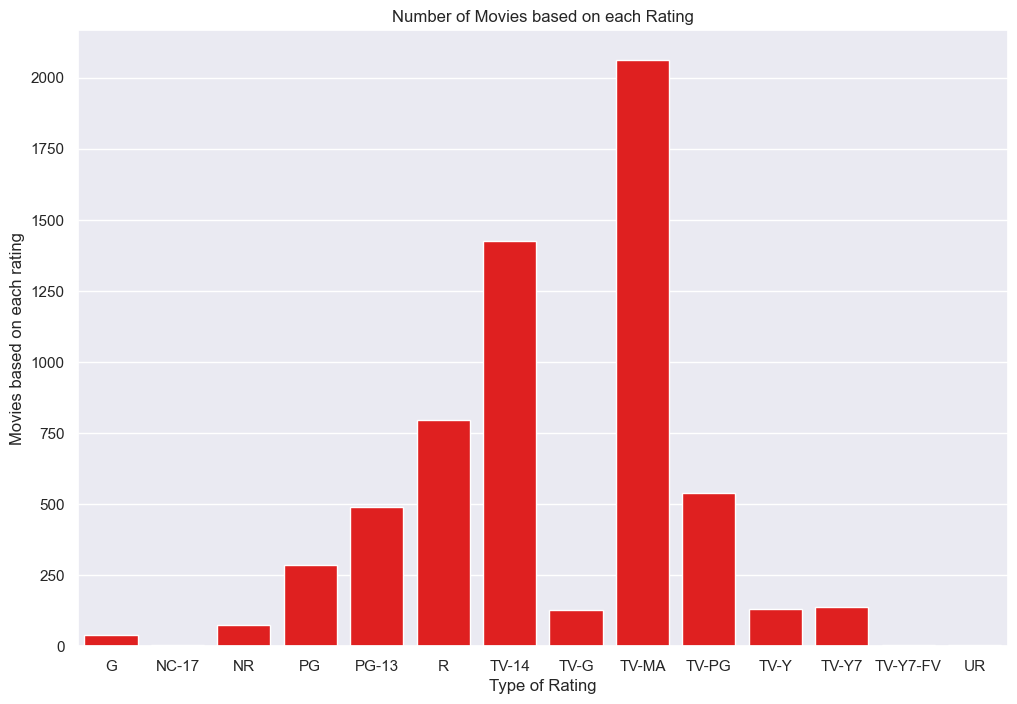

In [32]:
df3= pd.DataFrame(merged_df[merged_df['type']=='Movie'].groupby('rating')['show_id'].nunique().reset_index())

plt.figure(figsize=(12,8))
sns.barplot(data=df3,x='rating',y='show_id',color='red')
sns.set(style="darkgrid")
plt.title('Number of Movies based on each Rating')
plt.xlabel('Type of Rating', fontsize=12)
plt.ylabel('Movies based on each rating')
plt.show()

### TV Shows based on each Rating

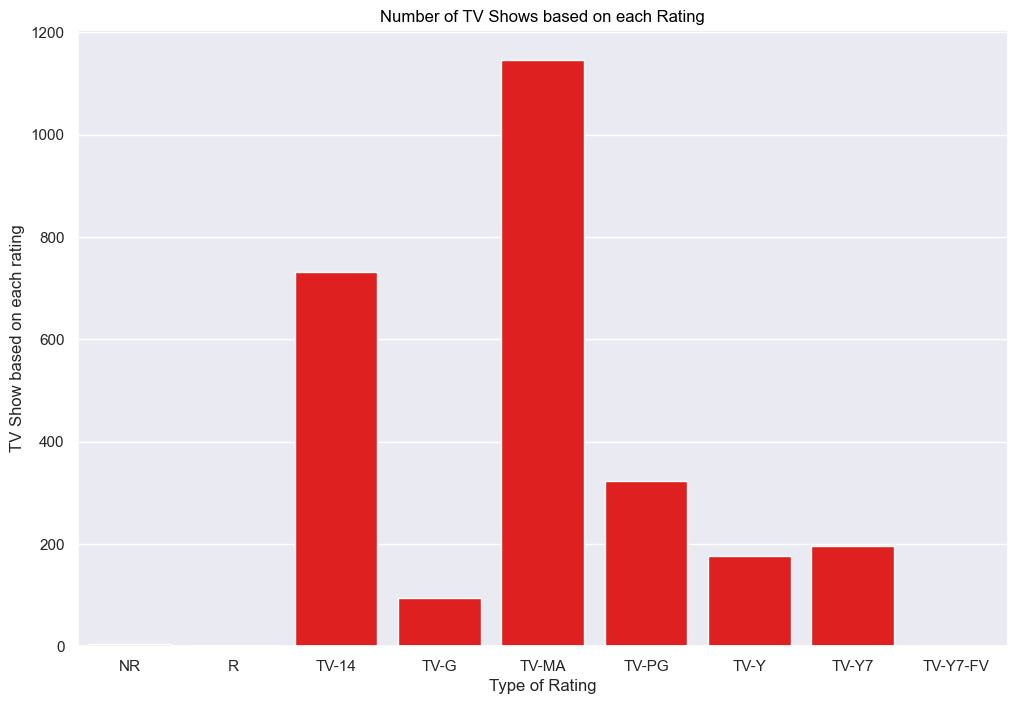

In [31]:
df3= pd.DataFrame(merged_df[merged_df['type']=='TV Show'].groupby('rating')['show_id'].nunique().reset_index())

plt.figure(figsize=(12,8))
sns.barplot(data=df3,x='rating',y='show_id',color='red')
plt.title('Number of TV Shows based on each Rating',fontsize=12,color='black')
plt.xlabel('Type of Rating',fontsize=12)
plt.ylabel('TV Show based on each rating')
plt.show()

### Distrubution of Duration of Movies

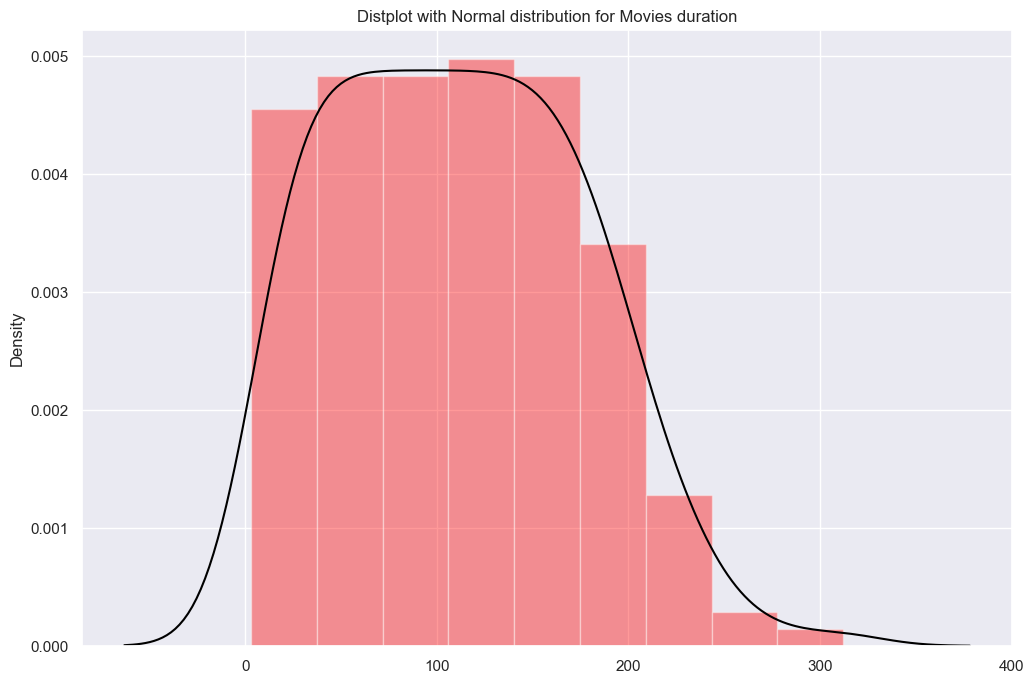

In [184]:
import warnings
warnings.filterwarnings("ignore")


df4= pd.DataFrame(merged_df[merged_df['type']=='Movie'].groupby('duration')['show_id'].nunique().reset_index())

plt.figure(figsize=(12,8))


ax=sns.distplot(df4['duration'].str.extract('(\d+)'),kde=True,color='red')
ax.lines[0].set_color('black')
plt.title('Distplot with Normal distribution for Movies duration')

plt.show()

### Number of Tv Shows for each number of season

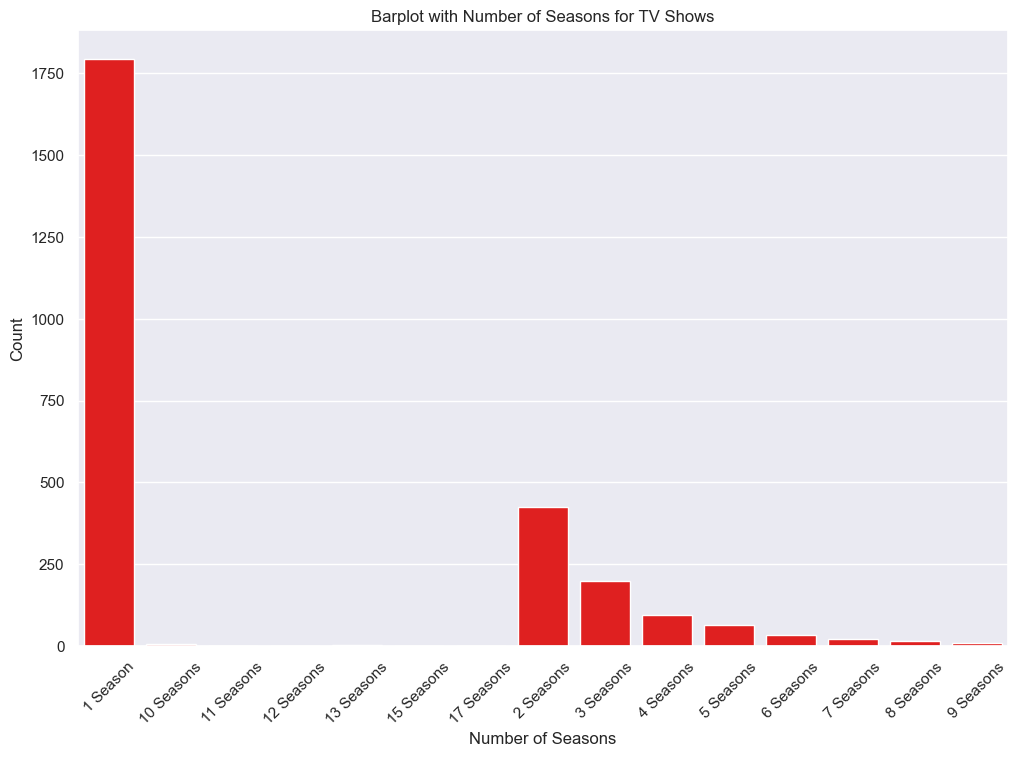

In [185]:
df5= pd.DataFrame(merged_df[merged_df['type']=='TV Show'].groupby('duration')['show_id'].nunique().reset_index())

plt.figure(figsize=(12,8))


sns.barplot(data=df5,x='duration',y='show_id',color='Red')

plt.title('Barplot with Number of Seasons for TV Shows')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### relation between content relase year vs netflix added year

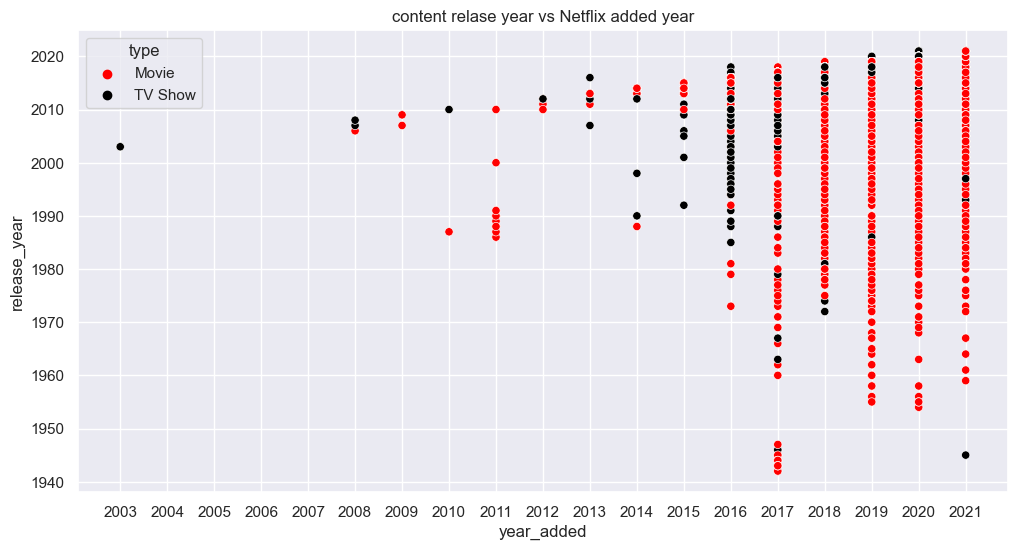

In [199]:
df6= pd.DataFrame(merged_df.groupby(['show_id','release_year','year_added','type']).size()).reset_index().drop(columns=[0])
plt.figure(figsize=(12,6))
sns.scatterplot(data=df6,x='year_added',y='release_year',hue='type',palette={'Movie': 'red', 'TV Show': 'black'})
plt.title('content relase year vs Netflix added year')
plt.xticks(range(df6['year_added'].min(),df6['year_added'].max()+1))
plt.show()

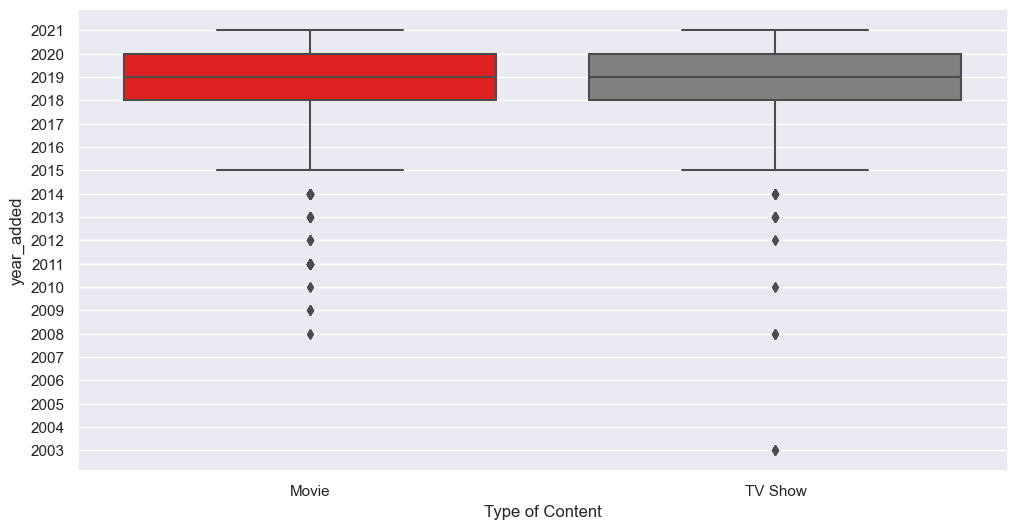

In [214]:
df7= pd.DataFrame(merged_df.groupby(['show_id','release_year','year_added','type']).size()).reset_index().drop(columns=[0])

plt.figure(figsize=(12,6))
sns.boxplot(data=df7,x='type',y='year_added',palette={'Movie': 'red', 'TV Show': 'grey'})
plt.xlabel('Type of Content')
plt.yticks(range(df7['year_added'].min(),df7['year_added'].max()+1))
plt.show()

### Correlation between type of rating and type of content

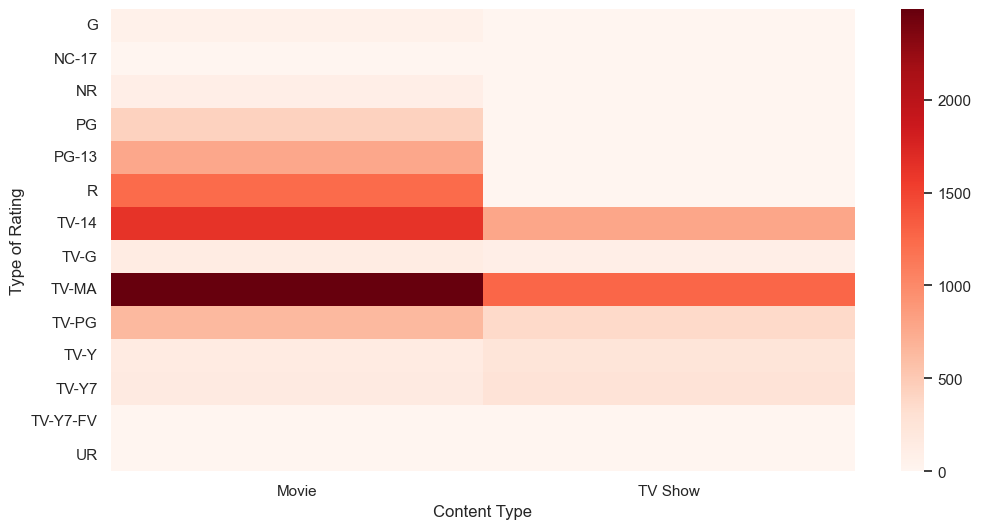

In [41]:
df8= pd.DataFrame(merged_df[merged_df['type']=='Movie'].groupby('country')['show_id'].nunique()).reset_index().sort_values(by='show_id',ascending=False).iloc[:20]
df7= pd.DataFrame(merged_df.groupby(['show_id','country','rating','type']).size()).reset_index().drop(columns=[0])
#df7['country'].isin(df8['country'])
plt.figure(figsize=(12,6))
sns.heatmap(pd.crosstab(df7['rating'],df7['type']),cmap='Reds')
plt.xlabel('Content Type')
plt.ylabel('Type of Rating')
plt.show()

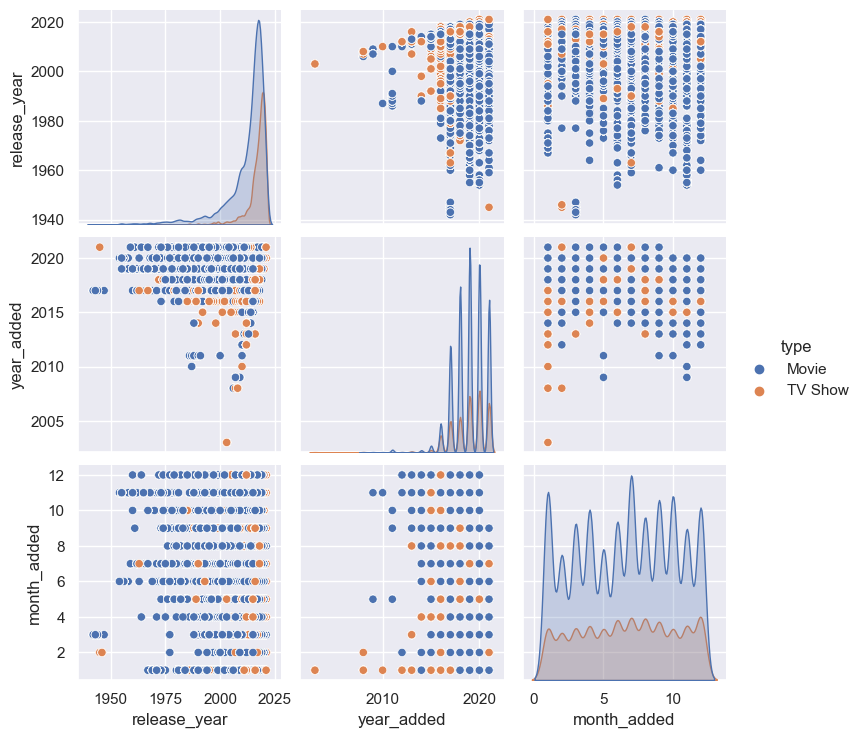

In [258]:
sns.pairplot(merged_df,hue='type')

## Business Insights


 
 * UnitedStates, India, UK are top 3 countries where most of the Movies and TV Shows are produced.
 * The dataset highlights the substantial representation of directors from different nations, with the United States taking  the lead with 2635 directors.
 * The data reveals a wide range of genres, encompassing everything from dramas to comedies, documentaries, action &   adventure, and more. This diverse offering suggests that Netflix aims to provide a comprehensive viewing experience, accommodating various moods and interests of its subscribers.
* TV shows are notably added in weeks around late March/early April, mid-June, and both early and late July. Additionally, there's a significant addition of TV shows in late October/early November.This pattern suggests that TV show releases have notable peaks in early summer, late summer, early fall, and late fall
* July and April are the months with the most new films added to Netflix, suggesting that summer is a popular season for releases.People have more free time in the summer, which encourages family outings. Additionally, the good weather in western countries like the US and UK draws people indoors, and international holiday times expand the audience base.

* A lot of additions also happen in December and January, around Christmas and New Year, probably because it's a joyous season, which makes it an excellent time for Netflix movie releases.


* Netflix's efforts to broaden its market presence and interact with viewers worldwide are also reflected in the distribution of directors among different areas. Netflix can produce content that appeals to particular regional preferences by investing in a varied talent pool. This will increase viewer engagement and subscriber growth.
* Netflix curates a diverse selection of content from around the world, as indicated by the significant presence of both "International Movies" and "International TV Shows" categories. This demonstrates Netflix's commitment to offering a global streaming experience, catering to diverse cultural tastes and preferences. 

* According to the data, TV-MA is the most common rating for content on Netflix, followed by TV-14 and TV-PG. This implies that a sizable portion of adult and mature content is available on Netflix.
* Most Netflix shows are rated for mature audiences, like TV-MA, TV-14, and TV-PG.
* These ratings signal that the content might have strong language, violence, or adult themes.
* Variety of Ratings this dataset demonstrates the huge range of age categories that Netflix caters to with its content. Because of its diversity, Netflix is able to serve a wide range of users and preferences.



## Recommendations

* The majority of Netflix's material is rated TV-MA (adult), which denotes a preference for adult, violent, and sexual content. Netflix should concentrate more on producing kid-friendly programming in order to attract more users.

* The best times to release material on Netflix are over the holidays, particularly from November to January, and in June throughout the summer.

* The most favoured genres include criminal, comedy, drama, action, and adventure. Netflix ought to produce more films and television series in these genres.

* Netflix can collaborate with the top actors like james franco,david attenborough,anupam kher to create more Movies/TV shows

* Top countries where netflix released most of the movies/TV shows are UnitedStates,India, United Kingdom netflix should focus more on these countries when there are adding a new moie/ tv show. 

* Netflix can focus on more actor-director pair for best outcome for their beloved audience.


* Netflix can keep enhancing its parental control features to make watching more enjoyable for families and to guarantee the safety of their children. Parents can make informed decisions regarding their children's viewing habits by using educational resources, content screening capabilities, and customisable profiles with age limitations.

* Continue investing in producing high-quality original content across more popular Movie/TvShows to attract and retain subscribers. 

* Netflix Should focus on creating and adding more Movies as its watch time is lesser than Tv Shows watch time
